In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("C:/Users/kitano/3d_reconstruction/data/sample_video1/data_3d/3d_position_data.csv")
columns_list = df.columns.values.tolist()
df.head()

,frame,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,RIGHT_EYE_x,RIGHT_EYE_y,RIGHT_EYE_z,...,RIGHT_ANKLE_z,TOE_x,TOE_y,TOE_z,HOSEL_x,HOSEL_y,HOSEL_z,GRIP_x,GRIP_y,GRIP_z
0,0,-0.264125,0.291212,1.047597,-0.259694,0.286851,1.049950,-0.269516,0.286664,1.049243,...,1.001056,-0.195946,0.453531,0.895445,-0.200289,0.458541,0.907327,-0.238246,0.387638,1.014841
1,1,-0.265822,0.290657,1.045463,-0.261495,0.286531,1.047868,-0.270537,0.286393,1.047749,...,1.001066,-0.195795,0.453561,0.895421,-0.200260,0.458549,0.907123,-0.238455,0.387565,1.014616
2,2,-0.264044,0.291278,1.046537,-0.259824,0.287095,1.049105,-0.269264,0.286889,1.048260,...,1.000977,-0.195901,0.453613,0.895405,-0.200345,0.458609,0.907224,-0.238711,0.387310,1.014558
3,3,-0.264300,0.291774,1.047883,-0.259915,0.287475,1.050104,-0.269583,0.287248,1.049508,...,1.000860,-0.195705,0.453823,0.895320,-0.200290,0.458706,0.907054,-0.238778,0.387104,1.014645
4,4,-0.265051,0.291917,1.049470,-0.260616,0.287569,1.051138,-0.270085,0.287332,1.051072,...,1.001010,-0.195866,0.453533,0.895317,-0.200450,0.458444,0.907180,-0.238807,0.387209,1.015116


In [61]:
df["WRIST_DISTANCE"] = df.apply(
    lambda x: np.sqrt(
        (x["LEFT_WRIST_x"] - x["RIGHT_WRIST_x"]) ** 2
        + (x["LEFT_WRIST_y"] - x["RIGHT_WRIST_y"]) ** 2
        + (x["LEFT_WRIST_z"] - x["RIGHT_WRIST_z"]) ** 2
    ),
    axis=1,
)

df["GRIP_DIFF_DISTANCE"] = (
    df[["GRIP_x", "GRIP_y", "GRIP_z"]]
    .diff()
    .fillna(0)
    .apply(lambda x: np.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2), axis=1)
)

df["RIGHT_WRIST_GRIP_DISTANCE"] = df.apply(
    lambda x: np.sqrt(
        (x["RIGHT_WRIST_x"] - x["GRIP_x"]) ** 2
        + (x["RIGHT_WRIST_y"] - x["GRIP_y"]) ** 2
        + (x["RIGHT_WRIST_z"] - x["GRIP_z"]) ** 2
    ),
    axis=1,
)

df["LEFT_WRIST_GRIP_DISTANCE"] = df.apply(
    lambda x: np.sqrt(
        (x["LEFT_WRIST_x"] - x["GRIP_x"]) ** 2
        + (x["LEFT_WRIST_y"] - x["GRIP_y"]) ** 2
        + (x["LEFT_WRIST_z"] - x["GRIP_z"]) ** 2
    ),
    axis=1,
)   

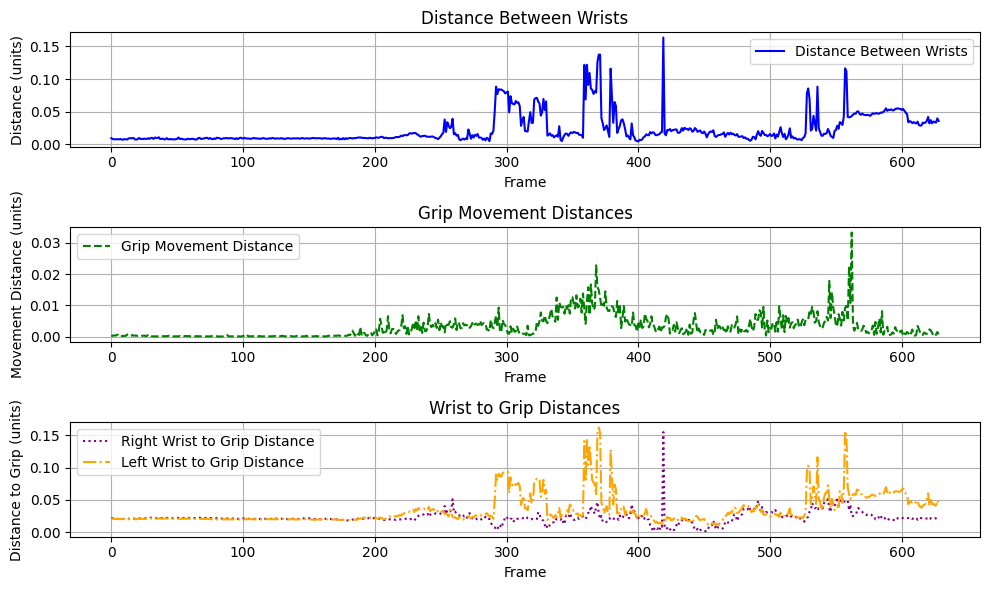

In [62]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6))

ax[0].plot(df.index, df["WRIST_DISTANCE"], label='Distance Between Wrists', color='blue')
ax[0].set_title('Distance Between Wrists')
ax[0].set_xlabel('Frame')
ax[0].set_ylabel('Distance (units)')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(df.index, df["GRIP_DIFF_DISTANCE"], label='Grip Movement Distance', linestyle='--', color='green')
ax[1].set_title('Grip Movement Distances')
ax[1].set_xlabel('Frame')
ax[1].set_ylabel('Movement Distance (units)')
ax[1].legend()
ax[1].grid(True)

ax[2].plot(df.index, df["RIGHT_WRIST_GRIP_DISTANCE"], label='Right Wrist to Grip Distance', linestyle=':', color='purple')
ax[2].plot(df.index, df["LEFT_WRIST_GRIP_DISTANCE"], label='Left Wrist to Grip Distance', linestyle='-.', color='orange')
ax[2].set_title('Wrist to Grip Distances')
ax[2].set_xlabel('Frame')
ax[2].set_ylabel('Distance to Grip (units)')
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()

In [63]:
from anomalydetector.outlier_detector import wrist_outlier_detect_and_interpolate

In [64]:
new_df = wrist_outlier_detect_and_interpolate(df)
new_df

,RIGHT_WRIST_x,RIGHT_WRIST_y,RIGHT_WRIST_z,LEFT_WRIST_x,LEFT_WRIST_y,LEFT_WRIST_z,GRIP_x,GRIP_y,GRIP_z,GRIP_DIFF_DISTANCE,RIGHT_WRIST_GRIP_DISTANCE,LEFT_WRIST_GRIP_DISTANCE
0,-0.251012,0.372607,1.024515,-0.242750,0.373338,1.029090,-0.238246,0.387638,1.014841,0.000000,0.021965,0.020683
1,-0.250615,0.372894,1.024777,-0.243376,0.373031,1.028620,-0.238455,0.387565,1.014616,0.000315,0.021596,0.020774
2,-0.250900,0.373049,1.024545,-0.244003,0.372829,1.028099,-0.238711,0.387310,1.014558,0.000366,0.021254,0.020521
3,-0.250899,0.372938,1.024467,-0.243994,0.372855,1.028057,-0.238778,0.387104,1.014645,0.000234,0.021073,0.020252
4,-0.250436,0.372963,1.024865,-0.243482,0.372695,1.028531,-0.238807,0.387209,1.015116,0.000484,0.020815,0.020310
...,...,...,...,...,...,...,...,...,...,...,...,...
624,-0.199568,0.371885,1.057837,-0.211200,0.364651,1.090040,-0.186349,0.387413,1.061446,0.000178,0.020710,0.044197
625,-0.200650,0.371395,1.056948,-0.209285,0.368166,1.089840,-0.186713,0.387287,1.061016,0.000577,0.021526,0.041304
626,-0.200059,0.372224,1.057239,-0.210459,0.368385,1.088698,-0.186289,0.387570,1.061195,0.000540,0.020995,0.041336
627,-0.200092,0.372187,1.057126,-0.213707,0.359290,1.092260,-0.187257,0.386820,1.060428,0.001445,0.019742,0.049707


In [65]:
new_df["WRIST_DISTANCE"] = new_df.apply(
    lambda x: np.sqrt(
        (x["LEFT_WRIST_x"] - x["RIGHT_WRIST_x"]) ** 2
        + (x["LEFT_WRIST_y"] - x["RIGHT_WRIST_y"]) ** 2
        + (x["LEFT_WRIST_z"] - x["RIGHT_WRIST_z"]) ** 2
    ),
    axis=1,
)

new_df["GRIP_DIFF_DISTANCE"] = (
    new_df[["GRIP_x", "GRIP_y", "GRIP_z"]]
    .diff()
    .fillna(0)
    .apply(lambda x: np.sqrt(x[0] ** 2 + x[1] ** 2 + x[2] ** 2), axis=1)
)

new_df["RIGHT_WRIST_GRIP_DISTANCE"] = new_df.apply(
    lambda x: np.sqrt(
        (x["RIGHT_WRIST_x"] - x["GRIP_x"]) ** 2
        + (x["RIGHT_WRIST_y"] - x["GRIP_y"]) ** 2
        + (x["RIGHT_WRIST_z"] - x["GRIP_z"]) ** 2
    ),
    axis=1,
)

new_df["LEFT_WRIST_GRIP_DISTANCE"] = new_df.apply(
    lambda x: np.sqrt(
        (x["LEFT_WRIST_x"] - x["GRIP_x"]) ** 2
        + (x["LEFT_WRIST_y"] - x["GRIP_y"]) ** 2
        + (x["LEFT_WRIST_z"] - x["GRIP_z"]) ** 2
    ),
    axis=1,
)   

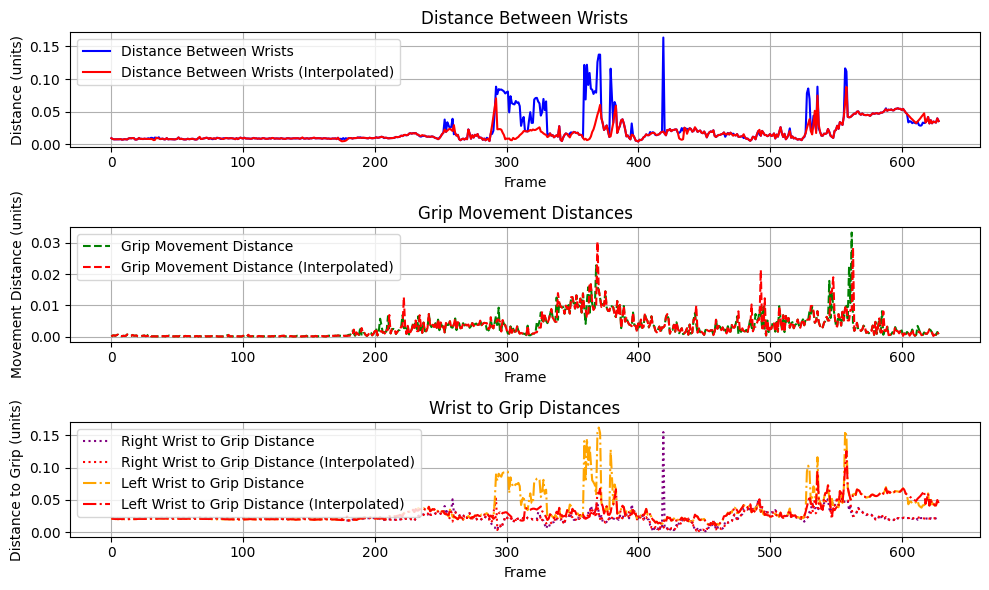

In [66]:
fig, ax = plt.subplots(3, 1, figsize=(10, 6))

ax[0].plot(df.index, df["WRIST_DISTANCE"], label='Distance Between Wrists', color='blue')
ax[0].plot(new_df.index, new_df["WRIST_DISTANCE"], label='Distance Between Wrists (Interpolated)', color='red')
ax[0].set_title('Distance Between Wrists')
ax[0].set_xlabel('Frame')
ax[0].set_ylabel('Distance (units)')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(df.index, df["GRIP_DIFF_DISTANCE"], label='Grip Movement Distance', linestyle='--', color='green')
ax[1].plot(new_df.index, new_df["GRIP_DIFF_DISTANCE"], label='Grip Movement Distance (Interpolated)', linestyle='--', color='red')
ax[1].set_title('Grip Movement Distances')
ax[1].set_xlabel('Frame')
ax[1].set_ylabel('Movement Distance (units)')
ax[1].legend()
ax[1].grid(True)

ax[2].plot(df.index, df["RIGHT_WRIST_GRIP_DISTANCE"], label='Right Wrist to Grip Distance', linestyle=':', color='purple')
ax[2].plot(new_df.index, new_df["RIGHT_WRIST_GRIP_DISTANCE"], label='Right Wrist to Grip Distance (Interpolated)', linestyle=':', color='red')
ax[2].plot(df.index, df["LEFT_WRIST_GRIP_DISTANCE"], label='Left Wrist to Grip Distance', linestyle='-.', color='orange')
ax[2].plot(new_df.index, new_df["LEFT_WRIST_GRIP_DISTANCE"], label='Left Wrist to Grip Distance (Interpolated)', linestyle='-.', color='red')
ax[2].set_title('Wrist to Grip Distances')
ax[2].set_xlabel('Frame')
ax[2].set_ylabel('Distance to Grip (units)')
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()

In [67]:
df[["GRIP_x", "GRIP_y", "GRIP_z"]] = new_df[["GRIP_x", "GRIP_y", "GRIP_z"]]
df[["RIGHT_WRIST_x", "RIGHT_WRIST_y", "RIGHT_WRIST_z"]] = new_df[["RIGHT_WRIST_x", "RIGHT_WRIST_y", "RIGHT_WRIST_z"]]
df[["LEFT_WRIST_x", "LEFT_WRIST_y", "LEFT_WRIST_z"]] = new_df[["LEFT_WRIST_x", "LEFT_WRIST_y", "LEFT_WRIST_z"]]

In [70]:
df = df[columns_list].copy()
df.head()

,frame,NOSE_x,NOSE_y,NOSE_z,LEFT_EYE_x,LEFT_EYE_y,LEFT_EYE_z,RIGHT_EYE_x,RIGHT_EYE_y,RIGHT_EYE_z,...,RIGHT_ANKLE_z,TOE_x,TOE_y,TOE_z,HOSEL_x,HOSEL_y,HOSEL_z,GRIP_x,GRIP_y,GRIP_z
0,0,-0.264125,0.291212,1.047597,-0.259694,0.286851,1.049950,-0.269516,0.286664,1.049243,...,1.001056,-0.195946,0.453531,0.895445,-0.200289,0.458541,0.907327,-0.238246,0.387638,1.014841
1,1,-0.265822,0.290657,1.045463,-0.261495,0.286531,1.047868,-0.270537,0.286393,1.047749,...,1.001066,-0.195795,0.453561,0.895421,-0.200260,0.458549,0.907123,-0.238455,0.387565,1.014616
2,2,-0.264044,0.291278,1.046537,-0.259824,0.287095,1.049105,-0.269264,0.286889,1.048260,...,1.000977,-0.195901,0.453613,0.895405,-0.200345,0.458609,0.907224,-0.238711,0.387310,1.014558
3,3,-0.264300,0.291774,1.047883,-0.259915,0.287475,1.050104,-0.269583,0.287248,1.049508,...,1.000860,-0.195705,0.453823,0.895320,-0.200290,0.458706,0.907054,-0.238778,0.387104,1.014645
4,4,-0.265051,0.291917,1.049470,-0.260616,0.287569,1.051138,-0.270085,0.287332,1.051072,...,1.001010,-0.195866,0.453533,0.895317,-0.200450,0.458444,0.907180,-0.238807,0.387209,1.015116


In [71]:
# df.to_csv("C:/Users/kitano/3d_reconstruction/dev/3d_position_data_interpolated.csv", index=False)